<a href="https://colab.research.google.com/github/amirmahdiKhosravi/SENTENCE-LEVEL-SENTIMENT-ANALYSIS/blob/main/950122681013_KhosraviTabrizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentence-level Sentiment Analysis on "Software Dataset" from "Amazon Review Data":**

**Final project of DataMining Course from Univesity of Guilan**

Student: Amirmahdi Khosravi Tabrizi

Student ID: 950122681013

Professor: Javad PourMostafa

### **Importing libreries:**


In [ ]:
import pandas as pd
import numpy as np
import gzip
import json
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
#embedding:
!pip install transformers
import torch
import transformers as ppb
# classification:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 778kB 9.4MB/s 
     |████████████████████████████████| 890kB 29.1MB/s 
     |████████████████████████████████| 3.0MB 58.6MB/s 
     |████████████████████████████████| 1.1MB 57.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=4e2590f26965846fab4dd02b698bfafd39c7f68c0f242ddb93b324199ca314dd
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


**Here it is the list of Data Sets you can use: ( Default Data Set is "Software")**


1.   Amazon Fashion **(3,176 reviews)**
2.   All Beauty **(5,269 reviews)**
3.   Appliances **(2,277 reviews)**
4.   Arts, Crafts and Sewing **(494,485 reviews)**
5.   Automotive **(1,711,519 reviews)**
6.   Books **(27,164,983 reviews)**
7.   CDs and Vinyl **(1,443,755 reviews)**
8.   Cell Phones and Accessories **(1,128,437 reviews)**
9.   Clothing, Shoes and Jewelry **(11,285,464 reviews)**
10.  Digital Music **(169,781 reviews)**
11.  Electronics **(6,739,590 reviews)**
12.  Gift Cards **(2,972 reviews)**
13.  Grocery and Gourmet Food **(1,143,860 reviews)**
14.  Home and Kitchen **(6,898,955 reviews)**
15.  Industrial and Scientific **(77,071 reviews)**
16.  Kindle Store **(2,222,983 reviews)**
17.  Luxury Beauty **(34,278 reviews)**
18.  Magazine Subscriptions **(2,375 reviews)**
19.  Movies and TV **(3,410,019 reviews)**
20.  Musical Instruments **(231,392 reviews)**
21.  Office Products **(800,357 reviews)**
22.  Patio, Lawn and Garden **(798,415 reviews)**
23.  Pet Supplies **(2,098,325 reviews)**
24.  Prime Pantry **(137,788 reviews)**
25.  ***Software*** **(12,805 reviews)** <<<================== **MY CHOISE**
26.  Sports and Outdoors **(2,839,940 reviews)**
27. Tools and Home Improvement **(2,070,831 reviews)**
28.  Toys and Games **(1,828,971 reviews)**
29.  Video Games **(497,577 reviews)**


In [ ]:
print('Please use the list above and enter the ID of deta set you want to use (for default data set, leave it blank and press ENTER):')
dataset = input()
if dataset == '':
  dataset = '25'
print('Data set ID: {}'.format(dataset))

Please use the list above and enter the ID of deta set you want to use (for default data set, leave it blank and press ENTER):

Data set ID: 25




###     **First Phase (Importing the DS):**
1. Download and import "Software_5.json.gz" dataset from [Amazon Review Data (2018)](https://nijianmo.github.io/amazon/).
2. Print first five records of dataset.
3. Print the shape of dataframe.








In [ ]:
# Geting link and file's name of selected Data Set with the help of Switch_Case :

def switch_case(switch):
  dic = {1:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/AMAZON_FASHION_5.json.gz', 2:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty_5.json.gz',
         3:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Appliances_5.json.gz', 4:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Arts_Crafts_and_Sewing_5.json.gz',
         5:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Automotive_5.json.gz', 6:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books_5.json.gz',
         7:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/CDs_and_Vinyl_5.json.gz', 8:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz',
         9:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Clothing_Shoes_and_Jewelry_5.json.gz',
         10:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Digital_Music_5.json.gz', 11:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics_5.json.gz',
         12:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Gift_Cards_5.json.gz', 13:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Grocery_and_Gourmet_Food_5.json.gz',
         14:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Home_and_Kitchen_5.json.gz', 15:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Industrial_and_Scientific_5.json.gz',
         16:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Kindle_Store_5.json.gz', 17:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Luxury_Beauty_5.json.gz',
         18:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Magazine_Subscriptions_5.json.gz', 19:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz',
         20:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Musical_Instruments_5.json.gz', 21:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Office_Products_5.json.gz',
         22:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Patio_Lawn_and_Garden_5.json.gz', 23:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Pet_Supplies_5.json.gz',
         24:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Prime_Pantry_5.json.gz', 25:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Software_5.json.gz',
         26:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Sports_and_Outdoors_5.json.gz', 27:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Tools_and_Home_Improvement_5.json.gz',
         28:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Toys_and_Games_5.json.gz', 29:'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz'}

  link = dic.get(switch, 'http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Software_5.json.gz')
  return link

link = switch_case(int(dataset))
file_name = link.split('/')[-1]

In [ ]:
print('Data Set link: {}'.format(link))
print('Name of file: {}'.format(file_name))

Data Set link: http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Software_5.json.gz
Name of file: Software_5.json.gz


In [ ]:
# Downloading dataset:
!wget $link

# Functions wich had given by site itself to open "Software_5.json.gz":
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF(file_name)
print('\n' + '************************************************* PAY ATTENTION BELOW ****************************************************' + '\n')
print('number of rows: {}'.format(len(df)), '\n' + 'number of columns: {}'.format(len(df.columns)) + '\n')
df.iloc[:5]

--2020-07-11 13:48:01--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Software_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5339013 (5.1M) [application/octet-stream]
Saving to: ‘Software_5.json.gz’

Software_5.json.gz  100%[===================>]   5.09M  4.50MB/s    in 1.1s    

2020-07-11 13:48:03 (4.50 MB/s) - ‘Software_5.json.gz’ saved [5339013/5339013]


************************************************* PAY ATTENTION BELOW ****************************************************

number of rows: 12805 
number of columns: 12



,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4.0,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5.0,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5.0,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5.0,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN


###   **Second Phase ( Data Pre-processing ):**
1.   selecting "overall" and "reviewText" columns to remain.
2.   removing stopwords.



In [ ]:
# selecting "overall" and "reviewText" columns to remain:
main_df = df.copy()
df = df[['overall', 'reviewText']]
df

,overall,reviewText
0,4.0,I've been using Dreamweaver (and it's predeces...
1,4.0,"The demo is done with the PC version, with ref..."
2,5.0,If you've been wanting to learn how to create ...
3,5.0,I've been creating websites with Dreamweaver f...
4,5.0,I decided (after trying a number of other prod...
...,...,...
12800,4.0,When I ordered this it was listed as Photo Edi...
12801,3.0,This software has SO much going on. Theres a ...
12802,4.0,I have used both more complex and less complex...
12803,3.0,Pinnacle Studio 20 Ultimate is a perfectly ser...


In [ ]:
# removing stopwords:

# This function gets 'reviewText' column as 'series' and removes stopWords.
def remove_stop_words(series):
  not_to_remove = ['aren\'t', 'can\'t', 'couldn\'t', 'daren\'t', 'didn\'t', 'doesn\'t', 'don\'t', 'hasn\'t', 'haven\'t', 'hadn\'t', 'isn\'t', 'mayn\'t', 'mightn\'t', 'mustn\'t', 'needn\'t', 'oughtn\'t', 'shan\'t', 'shouldn\'t', 'wasn\'t', 'weren\'t', 'won\'t', 'wouldn\'t']

  for i ,review in enumerate(series):
    stop_words = set(stopwords.words('english'))                                # Geting the list of stopWords from 'nltk' library.
    stop_words.update([w.capitalize() for w in stop_words])                     # Add captitalized stopWords to 'stop_words' list.
    stop_words = [w for w in stop_words if not w in not_to_remove]              # Remove some words wich we need to remain in our text.
    word_tokens = word_tokenize(str(review))                                    # Tokenize 'review' (our text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]         # remove stopWords
    filtered_sentence = ' '.join([i for i in filtered_sentence if not any(c.isdigit() for c in i) and i.isalnum()]) # Remove digits and other signs.
    series[i] = filtered_sentence

  return series

main_df['summary'] = remove_stop_words(main_df['summary'])
df['reviewText'] = remove_stop_words(df['reviewText'])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,overall,reviewText
0,4.0,using Dreamweaver predecessor Macromedia Ultra...
1,4.0,demo done PC version references Mac version ne...
2,5.0,wanting learn create website either lacked con...
3,5.0,creating websites Dreamweaver years experience...
4,5.0,decided trying number products switch gold sta...
...,...,...
12800,4.0,ordered listed Photo Editing Software descript...
12801,3.0,software SO much going Theres plethora things ...
12802,4.0,used complex less complex software always retu...
12803,3.0,Pinnacle Studio Ultimate perfectly serviceable...


 ##  **Third Phase ( Data Splitting ):**
**1.   Make "Training Set" and "Test Set" out of main Data Set.**



In [ ]:
training_set = df.iloc[:round(0.75*len(df))-1].reset_index()[['overall', 'reviewText']]       # Selecting about 3/4 of main Data Set as 'training_set'
test_set = df.iloc[round(0.75*len(df))-1:].reset_index()[['overall', 'reviewText']]           # Selecting remaining 1/4 of main Data Set as 'test_set'

In [ ]:
# SHOW TIME FOR TRAINING SET ;)

print('TRAINING SET:' + '\n')
print('number of rows:{}'.format(len(training_set)), '\n' + 'number of columns:{}'.format(len(training_set.columns)) + '\n')
training_set

TRAINING SET:

number of rows:9603 
number of columns:2



,overall,reviewText
0,4.0,using Dreamweaver predecessor Macromedia Ultra...
1,4.0,demo done PC version references Mac version ne...
2,5.0,wanting learn create website either lacked con...
3,5.0,creating websites Dreamweaver years experience...
4,5.0,decided trying number products switch gold sta...
...,...,...
9598,4.0,Times finally changed Mac users comes dictatio...
9599,3.0,nearly month high hopes software perhaps high ...
9600,4.0,used speech text product time last Dragon Dict...
9601,5.0,highly recommend product tried earlier generat...


In [ ]:
# SHOW TIME FOR TEST SET ;)

print('TEST SET:' + '\n')
print('number of rows: {}'.format(len(test_set)), '\n' + 'number of columns: {}'.format(len(test_set.columns)) + '\n')
test_set

TEST SET:

number of rows: 3202 
number of columns: 2



,overall,reviewText
0,3.0,Macbook set run Windows VMware Fusion three pr...
1,5.0,test features new Dragon Dictate Mac decided d...
2,5.0,Nuance got right Dragon used Dragon PC years o...
3,5.0,use download line books taxes
4,4.0,easiest figure even experienced computer perso...
...,...,...
3197,4.0,ordered listed Photo Editing Software descript...
3198,3.0,software SO much going Theres plethora things ...
3199,4.0,used complex less complex software always retu...
3200,3.0,Pinnacle Studio Ultimate perfectly serviceable...


### **Fourth Phase ( Word Embedding ):**
Implementing ***BERT*** algorithm to transfer our data to vector space.
___________________________

***NOTE***: I use These two funtions ( **"standardize_training_set_for_tokenizing"** and **"standardize_test_set_for_tokenizing"** to replacing large sentenses with "summary". Because max lenght we have to use is 512 and too large sentences will cause 'warning' in tokenizing and also 'error' in training section.
I should mention that I just checked these function for large sentences of my data set (***software***) and I don't know if they work for large sentences of other data sets or not!! So I just use them for my data set and other data sets might have some errors if they contain large sentences.

In [ ]:
# We use this function to standardize the lenght of "reviewText" of training_set due to using in "tokenizer":
def standardize_training_set_for_tokenizing(t_set):
  for j, i in enumerate(t_set['reviewText']):       # We replace "reviewText" with "summary" if len("reviewText") > 415
    b = i.split(' ')
    if(len(b) > 415):
      t_set['reviewText'].iloc[j] = str(main_df['summary'].iloc[j])

# We use this function to standardize the lenght of "reviewText" of training_set due to using in "tokenizer":
def standardize_test_set_for_tokenizing(t_set):
  for j, i in enumerate(t_set['reviewText']):      # We replace "reviewText" with "summary" if len("reviewText") > 439
    b = i.split(' ')
    if(len(b) > 439):
      t_set['reviewText'].iloc[j] = str(main_df['summary'].iloc[j])

# This is a padding function to fill vectors with zeros if they were in different size:
def pad(tokenized):
  for j, i in enumerate(tokenized):
    if len(i) < 512:
      for k in range(512 - len(i)):
        tokenized[j].append(0)

if dataset == '25':
  standardize_training_set_for_tokenizing(training_set)
  standardize_test_set_for_tokenizing(test_set)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights, do_lower_case=True)
model = model_class.from_pretrained(pretrained_weights)

tokenized_training_features = training_set['reviewText'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True))) # tokenization of training_set_features
tokenized_test_features = test_set['reviewText'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))         # tokenization of test_set_features
pad(tokenized_training_features)
pad(tokenized_test_features)

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model
training_features = torch.tensor(tokenized_training_features)
test_features = torch.tensor(tokenized_test_features)
tokenized_test_features

0       [101, 6097, 8654, 2275, 2448, 3645, 1058, 2213...
1       [101, 3231, 2838, 2047, 5202, 4487, 25572, 261...
2       [101, 16371, 6651, 2288, 2157, 5202, 2109, 520...
3       [101, 2224, 8816, 2240, 2808, 7773, 102, 0, 0,...
4       [101, 25551, 3275, 2130, 5281, 3274, 2711, 641...
                              ...                        
3197    [101, 3641, 3205, 6302, 9260, 4007, 6412, 2267...
3198    [101, 4007, 2061, 2172, 2183, 2045, 2015, 2022...
3199    [101, 2109, 3375, 2625, 3375, 4007, 2467, 2709...
3200    [101, 26007, 2996, 7209, 6669, 2326, 3085, 464...
3201    [101, 2565, 7199, 3733, 2224, 3640, 2204, 3463...
Name: reviewText, Length: 3202, dtype: object

##  **Fifith Phrase ( Classification ):**

1.   Naive Bayes
2.  SVM
3. Logistic Regression



In [ ]:
# Naive Bayes:

gnb_clf = GaussianNB()                                       # Create model
gnb_clf.fit(training_features, training_set['overall'])      # Train
gnb_clf_predicts = gnb_clf.predict(test_features)            # Predict

In [ ]:
# SVM:

svm_clf = svm.SVC()                                          # Create model
svm_clf.fit(training_features, training_set['overall'])      # Train
svm_clf_predicts = svm_clf.predict(test_features)            # Predict

In [ ]:
# Logistic Regression:

logisticRegr = LogisticRegression()                           # Create model
logisticRegr.fit(training_features, training_set['overall'])  # Train
logisticRegr_predicts = logisticRegr.predict(test_features)   # Predict

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bayes accuracy: {}'.format(gnb_clf.score(test_features, test_set['overall'])))
print('SVM accuracy: {}'.format(svm_clf.score(test_features, test_set['overall'])))
print('logisti accuracy: {}'.format(logisticRegr.score(test_features, test_set['overall'])))

Bayes accuracy: 0.048094940662086194
SVM accuracy: 0.4678326046221112
logisti accuracy: 0.4437851342910681


## **Sixth Phase ( Model Evaluation ):**


*   Make Confision Matrix
*   F1-score Evaluation



In [ ]:
# Naive Bayes Confusion Matrix:

gnb_confusion_Matrix = pd.crosstab(gnb_clf_predicts, test_set['overall'])
gnb_confusion_Matrix

overall,1.0,2.0,3.0,4.0,5.0
row_0,,,,,
1.0,0,0,2,2,1
2.0,390,141,372,798,1450
3.0,2,1,2,5,5
4.0,2,1,11,11,6


In [ ]:
# SVM Confusion Matrix:

svm_confusion_Matrix = pd.crosstab(svm_clf_predicts, test_set['overall'])
svm_confusion_Matrix

overall,1.0,2.0,3.0,4.0,5.0
row_0,,,,,
1.0,3,1,0,0,0
3.0,0,0,1,0,0
4.0,36,20,40,102,70
5.0,355,122,346,714,1392


In [ ]:
# Logistic Regression Confusion Matrix:

logisticRegr_confusion_Matrix = pd.crosstab(logisticRegr_predicts, test_set['overall'])
logisticRegr_confusion_Matrix

overall,1.0,2.0,3.0,4.0,5.0
row_0,,,,,
1.0,7,3,14,29,27
2.0,4,0,3,17,12
3.0,12,5,15,46,30
4.0,33,22,59,106,100
5.0,338,113,296,618,1293


In [ ]:
scores = []

In [ ]:
# Naive Bayes f1_score:

gnb_f1_score = f1_score(test_set['overall'], gnb_clf_predicts, zero_division=1, average='macro')
scores.append(gnb_f1_score)
gnb_f1_score

0.024306895018908717

In [ ]:
# SVM f1_score:

svm_f1_score = f1_score(test_set['overall'], svm_clf_predicts, zero_division=1, average='macro')
scores.append(svm_f1_score)
svm_f1_score

0.1684892076530899

In [ ]:
# Logistic Regression f1_score:

logisticRegr_f1_score = f1_score(test_set['overall'], logisticRegr_predicts, zero_division=1, average='macro')
scores.append(logisticRegr_f1_score)
logisticRegr_f1_score

0.1808863093614888

##   **Seventh Phase ( Model Illustration ):**

In [ ]:
labels = ['Naive Bayes', 'SVM', 'Logistic Regression']
scores

[0.024306895018908717, 0.1684892076530899, 0.1808863093614888]

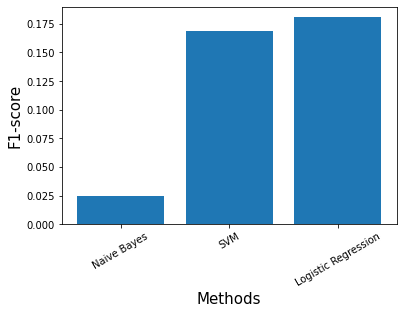

In [ ]:
index = np.arange(len(labels))                      # number of bars
plt.bar(index, scores)                              # make plot
plt.xlabel('Methods', fontsize=15)
plt.ylabel('F1-score', fontsize=15)
plt.xticks(index, labels, fontsize=10, rotation=30) # set bar names
plt.show()